In [2]:
import sqlalchemy, pymysql
db = sqlalchemy.create_engine(
     sqlalchemy.engine.url.URL(
          drivername="mysql+pymysql",
          username="root",
          password="intense-agency-314911", 
          host="34.101.233.26", 
          database="db_raw"
     )
)

In [3]:
df = []
with db.connect() as conn:
     qry = "SELECT * FROM details"
     results = conn.execute(qry).fetchall()
     for row in results:
            df.append(row)



In [4]:
Order_db = []
with db.connect() as conn:
    query = "SELECT Order_ID, Order_Date FROM orderr;"
    results = conn.execute(query).fetchall()
    for row in results:
        Order_db.append(row)

In [23]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [6]:
data_product = pd.DataFrame.from_records(df, columns = ["Order_ID", "Size", "Color", "Order", "Detail_Divan"])
data_order = pd.DataFrame.from_records(Order_db, columns = ["Order_ID", "Order_Date"])
data_product["Detail_Divan"] = data_product["Detail_Divan"].str.replace(r'\r', "")
data_order["Order_Date"] = pd.to_datetime(data_order["Order_Date"])
joined = data_product.set_index("Order_ID").join(data_order.set_index("Order_ID")).reset_index()

In [19]:
joined.head()

,Order_ID,Size,Color,Order,Detail_Divan,Order_Date
0,80714598-bfc1-11eb-a13d-a8a1598377d2,160,Hitam,Tipe1,Laci,2019-05-01
1,80714598-bfc1-11eb-a13d-a8a1598377d2,160,Hitam,Tipe1,Laci,2019-05-01
2,80714599-bfc1-11eb-9a53-a8a1598377d2,160,Abu-Abu,Tipe2,Biasa,2019-05-01
3,80714599-bfc1-11eb-9a53-a8a1598377d2,160,Abu-Abu,Tipe2,Biasa,2019-05-01
4,8071459a-bfc1-11eb-a94f-a8a1598377d2,120,Merah,Tipe4,Biasa,2019-05-01


In [31]:
joined_week = joined.copy()
joined_week["Order_Date"] = joined.Order_Date.dt.to_period('W').dt.to_timestamp()
input_date_week = "2019-11-12"
fixed_date = pd.Series(pd.to_datetime(input_date_week)).dt.to_period("W").dt.to_timestamp()
#pie_plot_week = joined_week[joined_week.Order_Date.isin(fixed_date)].groupby("Order").size()
line_plot_week = joined[joined.Order_Date.dt.to_period('W').dt.to_timestamp().isin(fixed_date)]
line_week_ready = line_plot_week.groupby(["Order_Date", "Order"]).size().unstack().fillna(0)

In [17]:
joined_month = joined.copy()
joined_month["Order_Date"] = joined.Order_Date.dt.to_period('M').dt.to_timestamp()
input_date_month = "2019-11-12"
fixed_date_month = pd.Series(pd.to_datetime(input_date_month)).dt.to_period("M").dt.to_timestamp()
#pie_plot_month = joined_month[joined_month.Order_Date.isin(fixed_date_month)].groupby("Order").size()
line_plot_month = joined[joined.Order_Date.dt.to_period('M').dt.to_timestamp().isin(fixed_date_month)]
line_month_ready = line_plot_month.groupby(["Order_Date", "Order"]).size().unstack().fillna(0)

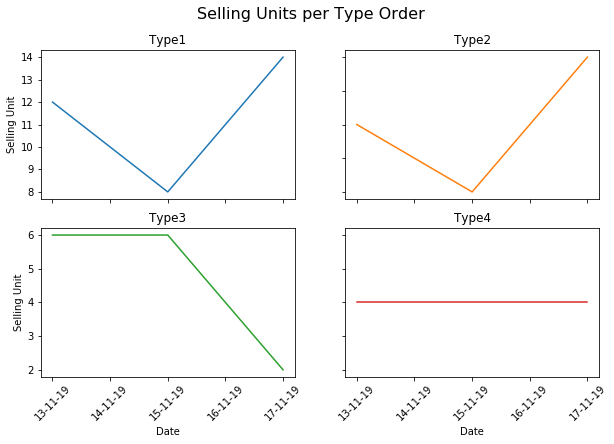

In [46]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))
fig.suptitle("Selling Units per Type Order", size = 16)
axs[0, 0].plot(line_week_ready.iloc[:, 0])
axs[0, 0].set_title("Type1")
axs[0, 1].plot(line_week_ready.iloc[:, 1], "tab:orange")
axs[0, 1].set_title("Type2")
axs[1, 0].plot(line_week_ready.iloc[:, 2], "tab:green")
axs[1, 0].set_title("Type3")
axs[1, 1].plot(line_week_ready.iloc[:, 3], "tab:red")
axs[1, 1].set_title("Type4")

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Selling Unit')

fmt_day = mdates.WeekdayLocator(byweekday=(mdates.MO, mdates.TU, mdates.WE, mdates.TH, mdates.FR, mdates.SA, mdates.SU))

for ax in axs.flat:
    ax.xaxis.set_major_locator(fmt_day)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
    ax.xaxis.set_tick_params(rotation = 45)
    ax.xaxis.set_tick_params(rotation = 45, which = "minor")

for ax in axs.flat:
    ax.label_outer()

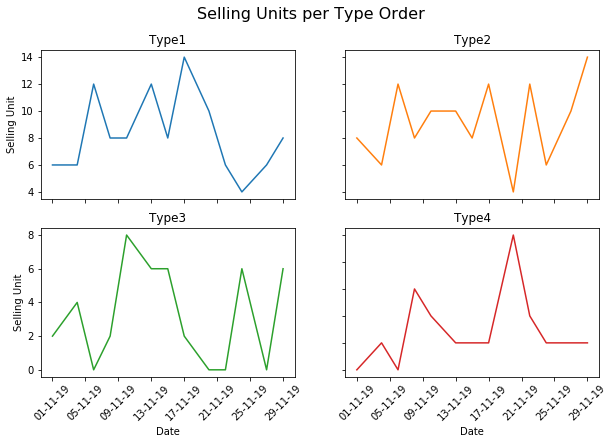

In [33]:

fig, axs = plt.subplots(2, 2, figsize = (10, 6))
fig.suptitle("Selling Units per Type Order", size = 16)
axs[0, 0].plot(line_month_ready.iloc[:, 0])
axs[0, 0].set_title("Type1")
axs[0, 1].plot(line_month_ready.iloc[:, 1], "tab:orange")
axs[0, 1].set_title("Type2")
axs[1, 0].plot(line_month_ready.iloc[:, 2], "tab:green")
axs[1, 0].set_title("Type3")
axs[1, 1].plot(line_month_ready.iloc[:, 3], "tab:red")
axs[1, 1].set_title("Type4")

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Selling Unit')

for ax in axs.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
    ax.xaxis.set_tick_params(rotation = 45)

for ax in axs.flat:
    ax.label_outer()